In [109]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

# 1. 코로나 확진자 수 데이터 전처리

In [2]:
co=pd.read_csv("C:\\sm\\mid_project\\data\\covid19_sido.csv")
co=co[["gubun","stdDay","incDec"]]
co=co[co["gubun"]=="합계"]
co=co.reset_index(drop=True)

In [3]:
# 월별 파생변수 추가
month=[]

for i in co["stdDay"]:
    p=re.compile("[0-9]+")
    month.append(p.findall(i)[1])

co["month"]=month

# month 컬럼 데이터 통일시키기
# month 데이터를 보면 3 또는 03 이런식으로 되어 있는 것이 있음
m=[]
for i in month:
    if (i=="3")|(i=="4")|(i=="5")|(i=="6"):
        m.append("0"+i)
    else:
        m.append(i)
co["month"]=m

# 연도 파생변수 추가
co["year"]=co["stdDay"].str[:4]

# 일별 파생변수 추가
day=[]

for i in co["stdDay"]:
    p=re.compile("[0-9]+")
    day.append(p.findall(i)[2])
    
# day 컬럼 데이터 통일시키기
# day 데이터를 보면 3 또는 03 이런식으로 되어 있는 것이 있음
d=[]
for i in day:
    if (i=="1")|(i=="9")|(i=="5")|(i=="8")|(i=="7")|(i=="6")|(i=="4"):
        d.append("0"+i)
    else:
        d.append(i)
co["day"]=d

In [4]:
# 필요한 연도만 분리
co20=co[co["year"]=="2020"]
co21=co[co["year"]=="2021"]

## (1) 20년, 21년도 분리한 데이터 각각 전처리

### 1) 20년도 데이터

In [5]:
# 한달이 30또는 31일인데 그 이상의 데이터 발견
co20["month"].value_counts()

04    38
12    37
10    33
09    32
08    32
11    31
07    31
06    31
05    31
03    29
Name: month, dtype: int64

In [6]:
# 중복된 데이터 처리 필요
co20=co20.drop_duplicates(['stdDay'])

In [7]:
# 제거가 안된 데이터 아직 존재
co20["month"].value_counts()

04    32
12    31
10    31
08    31
07    31
05    31
11    30
09    30
06    30
03    29
Name: month, dtype: int64

In [8]:
# 확인해서 직접 삭제
co20.drop([co20.index[266],co20.index[267]],inplace=True)

In [9]:
co20=co20[["year","month","day","incDec"]]
co20.columns=["year","month","day","covid"]
co20

,year,month,day,covid
698,2020,12,31,967.0
699,2020,12,30,1050.0
700,2020,12,29,1046.0
702,2020,12,28,808.0
703,2020,12,27,970.0
...,...,...,...,...
1018,2020,03,07,483.0
1019,2020,03,06,518.0
1020,2020,03,05,438.0
1021,2020,03,04,516.0


### 2) 21년도 데이터

In [10]:
# 한달이 30또는 31일인데 그 이상의 데이터 발견
co21["month"].value_counts()

08    32
07    32
04    32
01    32
12    31
11    31
10    31
05    31
03    31
09    30
06    30
02    29
Name: month, dtype: int64

In [11]:
# 중복된 데이터 처리 필요
co21=co21.drop_duplicates(['stdDay'])

In [12]:
# 제거 됐는지 확인
co21["month"].value_counts()

12    31
10    31
08    31
05    31
03    31
01    31
11    30
09    30
07    30
06    30
04    30
02    28
Name: month, dtype: int64

In [13]:
co21=co21[["year","month","day","incDec"]]
co21.columns=["year","month","day","covid"]
co21

,year,month,day,covid
326,2021,12,31,4875.0
327,2021,12,30,5037.0
328,2021,12,29,5409.0
329,2021,12,28,3865.0
330,2021,12,27,4207.0
...,...,...,...,...
692,2021,01,05,715.0
694,2021,01,04,1020.0
695,2021,01,03,657.0
696,2021,01,02,824.0


### 3) 데이터 합치기

In [194]:
cov=pd.concat([co21,co20])
cov=cov.reset_index(drop=True)

In [195]:
cov

,year,month,day,covid
0,2021,12,31,4875.0
1,2021,12,30,5037.0
2,2021,12,29,5409.0
3,2021,12,28,3865.0
4,2021,12,27,4207.0
...,...,...,...,...
663,2020,03,07,483.0
664,2020,03,06,518.0
665,2020,03,05,438.0
666,2020,03,04,516.0


### 4) 진짜 코로나 전처리 데이터 저장

In [38]:
co20.to_csv("C:\\sm\\mid_project\\data\\covid20.csv")
co21.to_csv("C:\\sm\\mid_project\\data\\covid21.csv")

In [213]:
cov.to_csv("C:\\sm\\mid_project\\data\\real_covdata.csv")

# 2. 영화 관객수

## (1) 20년도 자료 전처리

In [18]:
m2020_04 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_04.xlsx",header=[4,5])
m2020_04 = m2020_04[:-1]

m2020_05 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_05.xlsx",header=[4,5])
m2020_05 = m2020_05[:-1]

m2020_06 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_06.xlsx",header=[4,5])
m2020_06 = m2020_06[:-1]

m2020_07 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_07.xlsx",header=[4,5])
m2020_07 = m2020_07[:-1]

m2020_08 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_08.xlsx",header=[4,5])
m2020_08 = m2020_08[:-1]

m2020_09 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_09.xlsx",header=[4,5])
m2020_09 = m2020_09[:-1]

m2020_10 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_10.xlsx",header=[4,5])
m2020_10 = m2020_10[:-1]

m2020_11 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_11.xlsx",header=[4,5])
m2020_11 = m2020_11[:-1]

m2020_12 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2020_12.xlsx",header=[4,5])
m2020_12 = m2020_12[:-1]

In [19]:
# 날짜형 문자형으로 바꿔주기

m2020_04["연도","Unnamed: 0_level_1"]= m2020_04["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_04["연도","Unnamed: 0_level_1"] = m2020_04["연도","Unnamed: 0_level_1"].astype(str)

m2020_05["연도","Unnamed: 0_level_1"]= m2020_05["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_05["연도","Unnamed: 0_level_1"] = m2020_05["연도","Unnamed: 0_level_1"].astype(str)

m2020_06["연도","Unnamed: 0_level_1"]= m2020_06["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_06["연도","Unnamed: 0_level_1"] = m2020_06["연도","Unnamed: 0_level_1"].astype(str)

m2020_07["연도","Unnamed: 0_level_1"]= m2020_07["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_07["연도","Unnamed: 0_level_1"] = m2020_07["연도","Unnamed: 0_level_1"].astype(str)

m2020_08["연도","Unnamed: 0_level_1"]= m2020_08["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_08["연도","Unnamed: 0_level_1"] = m2020_08["연도","Unnamed: 0_level_1"].astype(str)

m2020_09["연도","Unnamed: 0_level_1"]= m2020_09["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_09["연도","Unnamed: 0_level_1"] = m2020_09["연도","Unnamed: 0_level_1"].astype(str)

m2020_10["연도","Unnamed: 0_level_1"]= m2020_10["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_10["연도","Unnamed: 0_level_1"] = m2020_10["연도","Unnamed: 0_level_1"].astype(str)

m2020_11["연도","Unnamed: 0_level_1"]= m2020_11["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_11["연도","Unnamed: 0_level_1"] = m2020_11["연도","Unnamed: 0_level_1"].astype(str)

m2020_12["연도","Unnamed: 0_level_1"]= m2020_12["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2020_12["연도","Unnamed: 0_level_1"] = m2020_12["연도","Unnamed: 0_level_1"].astype(str)

In [20]:
# 월만 추출

m20_04=[]
for i in m2020_04["연도","Unnamed: 0_level_1"]:
    m20_04.append(i[4:6])
    
m20_05=[]
for i in m2020_05["연도","Unnamed: 0_level_1"]:
    m20_05.append(i[4:6])

m20_06=[]
for i in m2020_06["연도","Unnamed: 0_level_1"]:
    m20_06.append(i[4:6])
    
m20_07=[]
for i in m2020_07["연도","Unnamed: 0_level_1"]:
    m20_07.append(i[4:6])
    
m20_08=[]
for i in m2020_08["연도","Unnamed: 0_level_1"]:
    m20_08.append(i[4:6])

m20_09=[]
for i in m2020_09["연도","Unnamed: 0_level_1"]:
    m20_09.append(i[4:6])
    
m20_10=[]
for i in m2020_10["연도","Unnamed: 0_level_1"]:
    m20_10.append(i[4:6])
    
m20_11=[]
for i in m2020_11["연도","Unnamed: 0_level_1"]:
    m20_11.append(i[4:6])

m20_12=[]
for i in m2020_12["연도","Unnamed: 0_level_1"]:
    m20_12.append(i[4:6])

In [21]:
# 연도만 추출

y20_04=[]
for i in m2020_04["연도","Unnamed: 0_level_1"]:
    y20_04.append(i[:4])
    
y20_05=[]
for i in m2020_05["연도","Unnamed: 0_level_1"]:
    y20_05.append(i[:4])
    
y20_06=[]
for i in m2020_06["연도","Unnamed: 0_level_1"]:
    y20_06.append(i[:4])
    
y20_07=[]
for i in m2020_07["연도","Unnamed: 0_level_1"]:
    y20_07.append(i[:4])
    
y20_08=[]
for i in m2020_08["연도","Unnamed: 0_level_1"]:
    y20_08.append(i[:4])
    
y20_09=[]
for i in m2020_09["연도","Unnamed: 0_level_1"]:
    y20_09.append(i[:4])

y20_10=[]
for i in m2020_10["연도","Unnamed: 0_level_1"]:
    y20_10.append(i[:4])
    
y20_11=[]
for i in m2020_11["연도","Unnamed: 0_level_1"]:
    y20_11.append(i[:4])
    
y20_12=[]
for i in m2020_12["연도","Unnamed: 0_level_1"]:
    y20_12.append(i[:4])

In [22]:
# 일만 추출

d20_04=[]
for i in m2020_04["연도","Unnamed: 0_level_1"]:
    d20_04.append(i[6:8])
    
d20_05=[]
for i in m2020_05["연도","Unnamed: 0_level_1"]:
    d20_05.append(i[6:8])
    
d20_06=[]
for i in m2020_06["연도","Unnamed: 0_level_1"]:
    d20_06.append(i[6:8])
    
d20_07=[]
for i in m2020_07["연도","Unnamed: 0_level_1"]:
    d20_07.append(i[6:8])
    
d20_08=[]
for i in m2020_08["연도","Unnamed: 0_level_1"]:
    d20_08.append(i[6:8])
    
d20_09=[]
for i in m2020_09["연도","Unnamed: 0_level_1"]:
    d20_09.append(i[6:8])

d20_10=[]
for i in m2020_10["연도","Unnamed: 0_level_1"]:
    d20_10.append(i[6:8])
    
d20_11=[]
for i in m2020_11["연도","Unnamed: 0_level_1"]:
    d20_11.append(i[6:8])
    
d20_12=[]
for i in m2020_12["연도","Unnamed: 0_level_1"]:
    d20_12.append(i[6:8])

In [23]:
# 월 파생변수 생성

m2020_04["전체","month"]=m20_04
m2020_05["전체","month"]=m20_05
m2020_06["전체","month"]=m20_06
m2020_07["전체","month"]=m20_07
m2020_08["전체","month"]=m20_08
m2020_09["전체","month"]=m20_09
m2020_10["전체","month"]=m20_10
m2020_11["전체","month"]=m20_11
m2020_12["전체","month"]=m20_12

# 월 파생변수 생성

m2020_04["전체","year"]=y20_04
m2020_05["전체","year"]=y20_05
m2020_06["전체","year"]=y20_06
m2020_07["전체","year"]=y20_07
m2020_08["전체","year"]=y20_08
m2020_09["전체","year"]=y20_09
m2020_10["전체","year"]=y20_10
m2020_11["전체","year"]=y20_11
m2020_12["전체","year"]=y20_12

# 일 파생변수 생성
m2020_04["전체","day"]=d20_04
m2020_05["전체","day"]=d20_05
m2020_06["전체","day"]=d20_06
m2020_07["전체","day"]=d20_07
m2020_08["전체","day"]=d20_08
m2020_09["전체","day"]=d20_09
m2020_10["전체","day"]=d20_10
m2020_11["전체","day"]=d20_11
m2020_12["전체","day"]=d20_12

# 전체만 추출
m2020_04=m2020_04["전체"]
m2020_05=m2020_05["전체"]
m2020_06=m2020_06["전체"]
m2020_07=m2020_07["전체"]
m2020_08=m2020_08["전체"]
m2020_09=m2020_09["전체"]
m2020_10=m2020_10["전체"]
m2020_11=m2020_11["전체"]
m2020_12=m2020_12["전체"]


# 필요한 컬럼 추출
m2020_04=m2020_04[["year","month","day","관객수"]]
m2020_05=m2020_05[["year","month","day","관객수"]]
m2020_06=m2020_06[["year","month","day","관객수"]]
m2020_07=m2020_07[["year","month","day","관객수"]]
m2020_08=m2020_08[["year","month","day","관객수"]]
m2020_09=m2020_09[["year","month","day","관객수"]]
m2020_10=m2020_10[["year","month","day","관객수"]]
m2020_11=m2020_11[["year","month","day","관객수"]]
m2020_12=m2020_12[["year","month","day","관객수"]]

In [28]:
mov20=pd.concat([m2020_04,m2020_05,m2020_06,m2020_07,m2020_08,m2020_09,m2020_10,m2020_11,m2020_12],ignore_index=True)
mov20.columns=["year","month","day","movie"]

In [29]:
mov20

,year,month,day,movie
0,2020,04,01,32390
1,2020,04,02,27536
2,2020,04,03,25690
3,2020,04,04,42628
4,2020,04,05,37548
...,...,...,...,...
270,2020,12,27,79216
271,2020,12,28,34456
272,2020,12,29,36828
273,2020,12,30,52810


## (2) 21년도 자료 전처리

In [30]:
m2021_01 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_01.xlsx",header=[4,5])
m2021_01 = m2021_01[:-1]

m2021_02 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_02.xlsx",header=[4,5])
m2021_02 = m2021_02[:-1]

m2021_03 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_03.xlsx",header=[4,5])
m2021_03 = m2021_03[:-1]

m2021_04 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_04.xlsx",header=[4,5])
m2021_04 = m2021_04[:-1]

m2021_05 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_05.xlsx",header=[4,5])
m2021_05 = m2021_05[:-1]

m2021_06 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_06.xlsx",header=[4,5])
m2021_06 = m2021_06[:-1]

m2021_07 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_07.xlsx",header=[4,5])
m2021_07 = m2021_07[:-1]

m2021_08 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_08.xlsx",header=[4,5])
m2021_08 = m2021_08[:-1]

m2021_09 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_09.xlsx",header=[4,5])
m2021_09 = m2021_09[:-1]

m2021_10 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_10.xlsx",header=[4,5])
m2021_10 = m2021_10[:-1]

m2021_11 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_11.xlsx",header=[4,5])
m2021_11 = m2021_11[:-1]

m2021_12 = pd.read_excel("C:\\Users\\somin\\Desktop\\일별 영화\\2021_12.xlsx",header=[4,5])
m2021_12 = m2021_12[:-1]

In [31]:
# 날짜형 문자형으로 바꿔주기

m2021_01["연도","Unnamed: 0_level_1"]= m2021_01["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_01["연도","Unnamed: 0_level_1"] = m2021_01["연도","Unnamed: 0_level_1"].astype(str)

m2021_02["연도","Unnamed: 0_level_1"]= m2021_02["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_02["연도","Unnamed: 0_level_1"] = m2021_02["연도","Unnamed: 0_level_1"].astype(str)

m2021_03["연도","Unnamed: 0_level_1"]= m2021_03["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_03["연도","Unnamed: 0_level_1"] = m2021_03["연도","Unnamed: 0_level_1"].astype(str)

m2021_04["연도","Unnamed: 0_level_1"]= m2021_04["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_04["연도","Unnamed: 0_level_1"] = m2021_04["연도","Unnamed: 0_level_1"].astype(str)

m2021_05["연도","Unnamed: 0_level_1"]= m2021_05["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_05["연도","Unnamed: 0_level_1"] = m2021_05["연도","Unnamed: 0_level_1"].astype(str)

m2021_06["연도","Unnamed: 0_level_1"]= m2021_06["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_06["연도","Unnamed: 0_level_1"] = m2021_06["연도","Unnamed: 0_level_1"].astype(str)

m2021_07["연도","Unnamed: 0_level_1"]= m2021_07["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_07["연도","Unnamed: 0_level_1"] = m2021_07["연도","Unnamed: 0_level_1"].astype(str)

m2021_08["연도","Unnamed: 0_level_1"]= m2021_08["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_08["연도","Unnamed: 0_level_1"] = m2021_08["연도","Unnamed: 0_level_1"].astype(str)

m2021_09["연도","Unnamed: 0_level_1"]= m2021_09["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_09["연도","Unnamed: 0_level_1"] = m2021_09["연도","Unnamed: 0_level_1"].astype(str)

m2021_10["연도","Unnamed: 0_level_1"]= m2021_10["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_10["연도","Unnamed: 0_level_1"] = m2021_10["연도","Unnamed: 0_level_1"].astype(str)

m2021_11["연도","Unnamed: 0_level_1"]= m2021_11["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_11["연도","Unnamed: 0_level_1"] = m2021_11["연도","Unnamed: 0_level_1"].astype(str)

m2021_12["연도","Unnamed: 0_level_1"]= m2021_12["연도","Unnamed: 0_level_1"].apply(lambda x: x.strftime('%Y%m%d'))
m2021_12["연도","Unnamed: 0_level_1"] = m2021_12["연도","Unnamed: 0_level_1"].astype(str)

In [32]:
# 월만 추출

m21_01=[]
for i in m2021_01["연도","Unnamed: 0_level_1"]:
    m21_01.append(i[4:6])
    
m21_02=[]
for i in m2021_02["연도","Unnamed: 0_level_1"]:
    m21_02.append(i[4:6])

m21_03=[]
for i in m2021_03["연도","Unnamed: 0_level_1"]:
    m21_03.append(i[4:6])
    
m21_04=[]
for i in m2021_04["연도","Unnamed: 0_level_1"]:
    m21_04.append(i[4:6])
    
m21_05=[]
for i in m2021_05["연도","Unnamed: 0_level_1"]:
    m21_05.append(i[4:6])

m21_06=[]
for i in m2021_06["연도","Unnamed: 0_level_1"]:
    m21_06.append(i[4:6])
    
m21_07=[]
for i in m2021_07["연도","Unnamed: 0_level_1"]:
    m21_07.append(i[4:6])
    
m21_08=[]
for i in m2021_08["연도","Unnamed: 0_level_1"]:
    m21_08.append(i[4:6])

m21_09=[]
for i in m2021_09["연도","Unnamed: 0_level_1"]:
    m21_09.append(i[4:6])
    
m21_10=[]
for i in m2021_10["연도","Unnamed: 0_level_1"]:
    m21_10.append(i[4:6])
    
m21_11=[]
for i in m2021_11["연도","Unnamed: 0_level_1"]:
    m21_11.append(i[4:6])

m21_12=[]
for i in m2021_12["연도","Unnamed: 0_level_1"]:
    m21_12.append(i[4:6])

In [33]:
# 연도만 추출

y21_01=[]
for i in m2021_01["연도","Unnamed: 0_level_1"]:
    y21_01.append(i[:4])
    
y21_02=[]
for i in m2021_02["연도","Unnamed: 0_level_1"]:
    y21_02.append(i[:4])
    
y21_03=[]
for i in m2021_03["연도","Unnamed: 0_level_1"]:
    y21_03.append(i[:4])
    
y21_04=[]
for i in m2021_04["연도","Unnamed: 0_level_1"]:
    y21_04.append(i[:4])
    
y21_05=[]
for i in m2021_05["연도","Unnamed: 0_level_1"]:
    y21_05.append(i[:4])
    
y21_06=[]
for i in m2021_06["연도","Unnamed: 0_level_1"]:
    y21_06.append(i[:4])
    
y21_07=[]
for i in m2021_07["연도","Unnamed: 0_level_1"]:
    y21_07.append(i[:4])
    
y21_08=[]
for i in m2021_08["연도","Unnamed: 0_level_1"]:
    y21_08.append(i[:4])
    
y21_09=[]
for i in m2021_09["연도","Unnamed: 0_level_1"]:
    y21_09.append(i[:4])

y21_10=[]
for i in m2021_10["연도","Unnamed: 0_level_1"]:
    y21_10.append(i[:4])
    
y21_11=[]
for i in m2021_11["연도","Unnamed: 0_level_1"]:
    y21_11.append(i[:4])
    
y21_12=[]
for i in m2021_12["연도","Unnamed: 0_level_1"]:
    y21_12.append(i[:4])

In [34]:
# 일만 추출

d21_01=[]
for i in m2021_01["연도","Unnamed: 0_level_1"]:
    d21_01.append(i[6:8])
    
d21_02=[]
for i in m2021_02["연도","Unnamed: 0_level_1"]:
    d21_02.append(i[6:8])
    
d21_03=[]
for i in m2021_03["연도","Unnamed: 0_level_1"]:
    d21_03.append(i[6:8])
    
d21_04=[]
for i in m2021_04["연도","Unnamed: 0_level_1"]:
    d21_04.append(i[6:8])
    
d21_05=[]
for i in m2021_05["연도","Unnamed: 0_level_1"]:
    d21_05.append(i[6:8])
    
d21_06=[]
for i in m2021_06["연도","Unnamed: 0_level_1"]:
    d21_06.append(i[6:8])
    
d21_07=[]
for i in m2021_07["연도","Unnamed: 0_level_1"]:
    d21_07.append(i[6:8])
    
d21_08=[]
for i in m2021_08["연도","Unnamed: 0_level_1"]:
    d21_08.append(i[6:8])
    
d21_09=[]
for i in m2021_09["연도","Unnamed: 0_level_1"]:
    d21_09.append(i[6:8])

d21_10=[]
for i in m2021_10["연도","Unnamed: 0_level_1"]:
    d21_10.append(i[6:8])
    
d21_11=[]
for i in m2021_11["연도","Unnamed: 0_level_1"]:
    d21_11.append(i[6:8])
    
d21_12=[]
for i in m2021_12["연도","Unnamed: 0_level_1"]:
    d21_12.append(i[6:8])

In [35]:
# 월 파생변수 생성

m2021_01["전체","month"]=m21_01
m2021_02["전체","month"]=m21_02
m2021_03["전체","month"]=m21_03
m2021_04["전체","month"]=m21_04
m2021_05["전체","month"]=m21_05
m2021_06["전체","month"]=m21_06
m2021_07["전체","month"]=m21_07
m2021_08["전체","month"]=m21_08
m2021_09["전체","month"]=m21_09
m2021_10["전체","month"]=m21_10
m2021_11["전체","month"]=m21_11
m2021_12["전체","month"]=m21_12

# 월 파생변수 생성

m2021_01["전체","year"]=y21_01
m2021_02["전체","year"]=y21_02
m2021_03["전체","year"]=y21_03
m2021_04["전체","year"]=y21_04
m2021_05["전체","year"]=y21_05
m2021_06["전체","year"]=y21_06
m2021_07["전체","year"]=y21_07
m2021_08["전체","year"]=y21_08
m2021_09["전체","year"]=y21_09
m2021_10["전체","year"]=y21_10
m2021_11["전체","year"]=y21_11
m2021_12["전체","year"]=y21_12

# 일 파생변수 생성

m2021_01["전체","day"]=d21_01
m2021_02["전체","day"]=d21_02
m2021_03["전체","day"]=d21_03
m2021_04["전체","day"]=d21_04
m2021_05["전체","day"]=d21_05
m2021_06["전체","day"]=d21_06
m2021_07["전체","day"]=d21_07
m2021_08["전체","day"]=d21_08
m2021_09["전체","day"]=d21_09
m2021_10["전체","day"]=d21_10
m2021_11["전체","day"]=d21_11
m2021_12["전체","day"]=d21_12

# 전체만 추출

m2021_01=m2021_01["전체"]
m2021_02=m2021_02["전체"]
m2021_03=m2021_03["전체"]
m2021_04=m2021_04["전체"]
m2021_05=m2021_05["전체"]
m2021_06=m2021_06["전체"]
m2021_07=m2021_07["전체"]
m2021_08=m2021_08["전체"]
m2021_09=m2021_09["전체"]
m2021_10=m2021_10["전체"]
m2021_11=m2021_11["전체"]
m2021_12=m2021_12["전체"]

# 필요한 컬럼 추출
m2021_01=m2021_01[["year","month","day","관객수"]]
m2021_02=m2021_02[["year","month","day","관객수"]]
m2021_03=m2021_03[["year","month","day","관객수"]]
m2021_04=m2021_04[["year","month","day","관객수"]]
m2021_05=m2021_05[["year","month","day","관객수"]]
m2021_06=m2021_06[["year","month","day","관객수"]]
m2021_07=m2021_07[["year","month","day","관객수"]]
m2021_08=m2021_08[["year","month","day","관객수"]]
m2021_09=m2021_09[["year","month","day","관객수"]]
m2021_10=m2021_10[["year","month","day","관객수"]]
m2021_11=m2021_11[["year","month","day","관객수"]]
m2021_12=m2021_12[["year","month","day","관객수"]]

In [36]:
mov21=pd.concat([m2021_01,m2021_02,m2021_03,m2021_04,m2021_05,m2021_06,m2021_07,m2021_08,m2021_09,m2021_10,m2021_11,m2021_12],ignore_index=True)
mov21.columns=["year","month","day","movie"]

In [37]:
mov21

,year,month,day,movie
0,2021,01,01,60747
1,2021,01,02,49018
2,2021,01,03,40186
3,2021,01,04,14518
4,2021,01,05,15741
...,...,...,...,...
360,2021,12,27,205300
361,2021,12,28,184211
362,2021,12,29,257281
363,2021,12,30,232871


## 3) 데이터 합치기

In [212]:
mov=pd.concat([mov21,mov20])

## 4) 진짜 영화 데이터 저장

In [214]:
mov.to_csv("C:\\sm\\mid_project\\data\\real_movdata.csv")

In [39]:
mov20.to_csv("C:\\sm\\mid_project\\data\\movie20.csv")
mov21.to_csv("C:\\sm\\mid_project\\data\\movie21.csv")

# 3. 상관분석을 위한 데이터

## (1) 코로나

In [51]:
cov20=co20[["month","covid"]]
cov21=co21[["month","covid"]]

In [52]:
cov20=cov20.reset_index(drop=True)
cov21=cov21.reset_index(drop=True)

In [61]:
cov21.index

RangeIndex(start=0, stop=364, step=1)

In [60]:
# co20 만들기
mar20=[]
apr20=[]
may20=[]
jun20=[]
jul20=[]
aug20=[]
sep20=[]
oct20=[]
nov20=[]
dec20=[]
for i in range(304):
    if cov20["month"][i]=="12":
        dec20.append(cov20.loc[i][1])
    if cov20["month"][i]=="11":
        nov20.append(cov20.loc[i][1])
    if cov20["month"][i]=="10":
        oct20.append(cov20.loc[i][1])
    if cov20["month"][i]=="09":
        sep20.append(cov20.loc[i][1])
    if cov20["month"][i]=="08":
        aug20.append(cov20.loc[i][1])
    if cov20["month"][i]=="07":
        jul20.append(cov20.loc[i][1])
    if cov20["month"][i]=="06":
        jun20.append(cov20.loc[i][1])
    if cov20["month"][i]=="05":
        may20.append(cov20.loc[i][1])
    if cov20["month"][i]=="04":
        apr20.append(cov20.loc[i][1])
    if cov20["month"][i]=="03":
        mar20.append(cov20.loc[i][1])

In [62]:
jan21=[]
feb21=[]
mar21=[]
apr21=[]
may21=[]
jun21=[]
jul21=[]
aug21=[]
sep21=[]
oct21=[]
nov21=[]
dec21=[]
for i in range(364):
    if cov21["month"][i]=="12":
        dec21.append(cov21.loc[i][1])
    if cov21["month"][i]=="11":
        nov21.append(cov21.loc[i][1])
    if cov21["month"][i]=="10":
        oct21.append(cov21.loc[i][1])
    if cov21["month"][i]=="09":
        sep21.append(cov21.loc[i][1])
    if cov21["month"][i]=="08":
        aug21.append(cov21.loc[i][1])
    if cov21["month"][i]=="07":
        jul21.append(cov21.loc[i][1])
    if cov21["month"][i]=="06":
        jun21.append(cov21.loc[i][1])
    if cov21["month"][i]=="05":
        may21.append(cov21.loc[i][1])
    if cov21["month"][i]=="04":
        apr21.append(cov21.loc[i][1])
    if cov21["month"][i]=="03":
        mar21.append(cov21.loc[i][1])
    if cov21["month"][i]=="02":
        feb21.append(cov21.loc[i][1])
    if cov21["month"][i]=="01":
        jan21.append(cov21.loc[i][1])

In [63]:
mar20=pd.DataFrame(mar20)
mar20=mar20.reset_index(drop=True)
mar20.columns=["20c3m4"]

apr20=pd.DataFrame(apr20)
apr20=apr20.reset_index(drop=True)
apr20.columns=["20c4m5"]

may20=pd.DataFrame(may20)
may20=may20.reset_index(drop=True)
may20.columns=["20c5m6"]

jun20=pd.DataFrame(jun20)
jun20=jun20.reset_index(drop=True)
jun20.columns=["20c6m7"]

jul20=pd.DataFrame(jul20)
jul20=jul20.reset_index(drop=True)
jul20.columns=["20c7m8"]

aug20=pd.DataFrame(aug20)
aug20=aug20.reset_index(drop=True)
aug20.columns=["20c8m9"]

sep20=pd.DataFrame(sep20)
sep20=sep20.reset_index(drop=True)
sep20.columns=["20c9m10"]

oct20=pd.DataFrame(oct20)
oct20=oct20.reset_index(drop=True)
oct20.columns=["20c10m11"]

nov20=pd.DataFrame(nov20)
nov20=nov20.reset_index(drop=True)
nov20.columns=["20c11m12"]

dec20=pd.DataFrame(dec20)
dec20=dec20.reset_index(drop=True)
dec20.columns=["20c1221m1"]

In [64]:
jan21=pd.DataFrame(jan21)
jan21=jan21.reset_index(drop=True)
jan21.columns=["21c1m2"]

feb21=pd.DataFrame(feb21)
feb21=feb21.reset_index(drop=True)
feb21.columns=["21c2m3"]

mar21=pd.DataFrame(mar21)
mar21=mar21.reset_index(drop=True)
mar21.columns=["21c3m4"]

apr21=pd.DataFrame(apr21)
apr21=apr21.reset_index(drop=True)
apr21.columns=["21c4m5"]

may21=pd.DataFrame(may21)
may21=may21.reset_index(drop=True)
may21.columns=["21c5m6"]

jun21=pd.DataFrame(jun21)
jun21=jun21.reset_index(drop=True)
jun21.columns=["21c6m7"]

jul21=pd.DataFrame(jul21)
jul21=jul21.reset_index(drop=True)
jul21.columns=["21c7m8"]

aug21=pd.DataFrame(aug21)
aug21=aug21.reset_index(drop=True)
aug21.columns=["21c8m9"]

sep21=pd.DataFrame(sep21)
sep21=sep21.reset_index(drop=True)
sep21.columns=["21c9m10"]

oct21=pd.DataFrame(oct21)
oct21=oct21.reset_index(drop=True)
oct21.columns=["21c10m11"]

nov21=pd.DataFrame(nov21)
nov21=nov21.reset_index(drop=True)
nov21.columns=["21c11m12"]

In [65]:
data20=pd.concat([mar20,apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20],axis=1)
data21=pd.concat([jan21,feb21,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21],axis=1)

In [66]:
data_covid = pd.concat([data20,data21],axis=1)

In [67]:
data_covid

,20c3m4,20c4m5,20c5m6,20c6m7,20c7m8,20c8m9,20c9m10,20c10m11,20c11m12,20c1221m1,...,21c2m3,21c3m4,21c4m5,21c5m6,21c6m7,21c7m8,21c8m9,21c9m10,21c10m11,21c11m12
0,125.0,4.0,27.0,43.0,36.0,248.0,113.0,127.0,438.0,967.0,...,356.0,506.0,661.0,430.0,794.0,1539.0,1372.0,2564.0,2061.0,3032.0
1,78.0,9.0,39.0,42.0,18.0,299.0,38.0,114.0,450.0,1050.0,...,415.0,447.0,680.0,39.0,595.0,1710.0,1487.0,2885.0,2104.0,3309.0
2,105.0,14.0,58.0,62.0,48.0,323.0,50.0,125.0,504.0,1046.0,...,406.0,384.0,775.0,533.0,501.0,1674.0,1619.0,2289.0,2124.0,3928.0
3,146.0,10.0,79.0,51.0,28.0,371.0,95.0,103.0,569.0,808.0,...,396.0,482.0,512.0,587.0,614.0,1896.0,1793.0,2383.0,2111.0,4068.0
4,91.0,10.0,40.0,39.0,25.0,441.0,61.0,88.0,583.0,970.0,...,440.0,505.0,500.0,629.0,668.0,1365.0,1841.0,2771.0,1952.0,3901.0
5,104.0,10.0,19.0,28.0,58.0,320.0,114.0,119.0,382.0,1132.0,...,357.0,494.0,644.0,707.0,634.0,1318.0,1882.0,3273.0,1266.0,3938.0
6,100.0,6.0,16.0,51.0,113.0,280.0,125.0,61.0,349.0,1241.0,...,332.0,430.0,785.0,516.0,610.0,1487.0,2155.0,2434.0,1190.0,4115.0
7,76.0,8.0,25.0,46.0,41.0,266.0,110.0,77.0,271.0,985.0,...,416.0,428.0,797.0,538.0,645.0,1629.0,1509.0,1716.0,1423.0,2699.0
8,64.0,11.0,23.0,17.0,59.0,397.0,61.0,155.0,330.0,1092.0,...,448.0,346.0,735.0,39.0,395.0,1630.0,1418.0,1720.0,1508.0,2827.0
9,98.0,9.0,20.0,48.0,63.0,332.0,70.0,121.0,386.0,869.0,...,561.0,415.0,731.0,666.0,357.0,1842.0,1628.0,1729.0,1440.0,3120.0


## (2) 영화 관객

In [68]:
mo20 = pd.read_csv("C:\\sm\\mid_project\\data\\movie20.csv")
mo21 = pd.read_csv("C:\\sm\\mid_project\\data\\movie21.csv")

In [70]:
mov20=mov20[["month","movie"]]
mov21=mov21[["month","movie"]]

In [71]:
mov20=mov20.reset_index(drop=True)
mov21=mov21.reset_index(drop=True)

In [75]:
mov21.index

RangeIndex(start=0, stop=365, step=1)

In [74]:
# mov20 만들기
apr20=[]
may20=[]
jun20=[]
jul20=[]
aug20=[]
sep20=[]
oct20=[]
nov20=[]
dec20=[]
for i in range(275):
    if mov20["month"][i]=="12":
        dec20.append(mov20.loc[i][1])
    if mov20["month"][i]=="11":
        nov20.append(mov20.loc[i][1])
    if mov20["month"][i]=="10":
        oct20.append(mov20.loc[i][1])
    if mov20["month"][i]=="09":
        sep20.append(mov20.loc[i][1])
    if mov20["month"][i]=="08":
        aug20.append(mov20.loc[i][1])
    if mov20["month"][i]=="07":
        jul20.append(mov20.loc[i][1])
    if mov20["month"][i]=="06":
        jun20.append(mov20.loc[i][1])
    if mov20["month"][i]=="05":
        may20.append(mov20.loc[i][1])
    if mov20["month"][i]=="04":
        apr20.append(mov20.loc[i][1])

In [76]:
jan21=[]
feb21=[]
mar21=[]
apr21=[]
may21=[]
jun21=[]
jul21=[]
aug21=[]
sep21=[]
oct21=[]
nov21=[]
dec21=[]
for i in range(365):
    if mov21["month"][i]=="12":
        dec21.append(mov21.loc[i][1])
    if mov21["month"][i]=="11":
        nov21.append(mov21.loc[i][1])
    if mov21["month"][i]=="10":
        oct21.append(mov21.loc[i][1])
    if mov21["month"][i]=="09":
        sep21.append(mov21.loc[i][1])
    if mov21["month"][i]=="08":
        aug21.append(mov21.loc[i][1])
    if mov21["month"][i]=="07":
        jul21.append(mov21.loc[i][1])
    if mov21["month"][i]=="06":
        jun21.append(mov21.loc[i][1])
    if mov21["month"][i]=="05":
        may21.append(mov21.loc[i][1])
    if mov21["month"][i]=="04":
        apr21.append(mov21.loc[i][1])
    if mov21["month"][i]=="03":
        mar21.append(mov21.loc[i][1])
    if mov21["month"][i]=="02":
        feb21.append(mov21.loc[i][1])
    if mov21["month"][i]=="01":
        jan21.append(mov21.loc[i][1])

In [80]:
apr20=pd.DataFrame(apr20)
apr20=apr20.reset_index(drop=True)
apr20.columns=["20c3m4"]

may20=pd.DataFrame(may20)
may20=may20.reset_index(drop=True)
may20.columns=["20c4m5"]

jun20=pd.DataFrame(jun20)
jun20=jun20.reset_index(drop=True)
jun20.columns=["20c5m6"]

jul20=pd.DataFrame(jul20)
jul20=jul20.reset_index(drop=True)
jul20.columns=["20c6m7"]

aug20=pd.DataFrame(aug20)
aug20=aug20.reset_index(drop=True)
aug20.columns=["20c7m8"]

sep20=pd.DataFrame(sep20)
sep20=sep20.reset_index(drop=True)
sep20.columns=["20c8m9"]

oct20=pd.DataFrame(oct20)
oct20=oct20.reset_index(drop=True)
oct20.columns=["20c9m10"]

nov20=pd.DataFrame(nov20)
nov20=nov20.reset_index(drop=True)
nov20.columns=["20c10m11"]

dec20=pd.DataFrame(dec20)
dec20=dec20.reset_index(drop=True)
dec20.columns=["20c11m12"]

In [81]:
jan21=pd.DataFrame(jan21)
jan21=jan21.reset_index(drop=True)
jan21.columns=["20c1221m1"]

feb21=pd.DataFrame(feb21)
feb21=feb21.reset_index(drop=True)
feb21.columns=["21c1m2"]

mar21=pd.DataFrame(mar21)
mar21=mar21.reset_index(drop=True)
mar21.columns=["21c2m3"]

apr21=pd.DataFrame(apr21)
apr21=apr21.reset_index(drop=True)
apr21.columns=["21c3m4"]

may21=pd.DataFrame(may21)
may21=may21.reset_index(drop=True)
may21.columns=["21c4m5"]

jun21=pd.DataFrame(jun21)
jun21=jun21.reset_index(drop=True)
jun21.columns=["21c5m6"]

jul21=pd.DataFrame(jul21)
jul21=jul21.reset_index(drop=True)
jul21.columns=["21c6m7"]

aug21=pd.DataFrame(aug21)
aug21=aug21.reset_index(drop=True)
aug21.columns=["21c7m8"]

sep21=pd.DataFrame(sep21)
sep21=sep21.reset_index(drop=True)
sep21.columns=["21c8m9"]

oct21=pd.DataFrame(oct21)
oct21=oct21.reset_index(drop=True)
oct21.columns=["21c9m10"]

nov21=pd.DataFrame(nov21)
nov21=nov21.reset_index(drop=True)
nov21.columns=["21c10m11"]

dec21=pd.DataFrame(dec21)
dec21=dec21.reset_index(drop=True)
dec21.columns=["21c11m12"]

In [82]:
data20=pd.concat([apr20,may20,jun20,jul20,aug20,sep20,oct20,nov20,dec20],axis=1)
data21=pd.concat([jan21,feb21,mar21,apr21,may21,jun21,jul21,aug21,sep21,oct21,nov21,dec21],axis=1)

In [83]:
data_movie = pd.concat([data20,data21],axis=1)

In [84]:
data_movie

,20c3m4,20c4m5,20c5m6,20c6m7,20c7m8,20c8m9,20c9m10,20c10m11,20c11m12,20c1221m1,...,21c2m3,21c3m4,21c4m5,21c5m6,21c6m7,21c7m8,21c8m9,21c9m10,21c10m11,21c11m12
0,32390.0,70147,28428.0,94073,436480,64780.0,372156,228647.0,40854,60747,...,162608,65824.0,204635,76466.0,118656,409792,224163.0,115591,81511.0,138340
1,27536.0,74721,27218.0,83832,369037,72023.0,411306,72249.0,40058,49018,...,47070,68983.0,159691,77178.0,164475,225973,155882.0,242601,83333.0,118661
2,25690.0,74923,28185.0,93356,192059,69075.0,389451,67671.0,48299,40186,...,77666,187487.0,57398,121954.0,306639,217963,173685.0,264556,337027.0,123887
3,42628.0,49275,84157.0,192541,191830,82074.0,299083,125420.0,42529,14518,...,79700,160755.0,77940,148388.0,286630,230747,396214.0,212283,223146.0,236162
4,37548.0,114696,84798.0,166229,452463,160869.0,89942,114139.0,68470,15741,...,87069,43160.0,326744,347457.0,93561,203358,364069.0,58414,277533.0,209509
5,15725.0,32685,165677.0,56653,384029,141700.0,78047,141729.0,64329,16591,...,222971,40889.0,61494,307184.0,109637,189014,110139.0,72805,592547.0,68607
6,15429.0,30920,151396.0,55184,421208,54559.0,86065,296003.0,24014,15393,...,214664,56611.0,69404,91282.0,256487,358920,92777.0,62562,515982.0,67631
7,18634.0,28718,46276.0,67422,729498,53254.0,89690,271064.0,21756,15419,...,58559,52712.0,113036,78851.0,224746,347158,100032.0,77907,143154.0,84529
8,18514.0,80420,43091.0,63649,654596,62622.0,194953,82144.0,24744,34658,...,55426,60001.0,122405,98863.0,249764,135384,106840.0,170800,125358.0,90725
9,18992.0,69039,74653.0,70847,265688,68788.0,180855,79844.0,48472,30662,...,58456,119307.0,40077,89855.0,527019,129620,110278.0,195155,180743.0,89414


###  데이터 저장

In [86]:
data_movie.to_csv("C:\\sm\\mid_project\\data\\상관분석을위한movie.csv")
data_covid.to_csv("C:\\sm\\mid_project\\data\\상관분석을위한covid.csv")

### 상관계수 구하기
- 데이터 설명 : data_covid와 data_movie의 컬럼 이름이 같은데 컬럼 이름이 같아야 상관계수를 구할 수 있다....
    - 20c3m4 : 20년도 3월 코로나 확진자 수와 20년도 4월 영화관객 수
    - 20c1221m1 : 20년도 12월 코로나 확진자 수와 21년도 1월 영화관객 수 

In [106]:
p=data_covid.corrwith(other = data_movie, method = "pearson")

In [119]:
p=pd.DataFrame(p)

<AxesSubplot:>

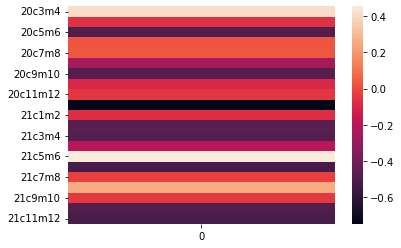

In [120]:
sns.heatmap(p)

### R에서 상관계수 구해서 파일 불러오기

In [102]:
data_corr=pd.read_csv("C:\\sm\\mid_project\\data\\data_pearson.csv")
data_corr=data_corr.set_index("Unnamed: 0")

In [104]:
data_corr.index.name = None

In [105]:
data_corr

,X20c3m4,X20c4m5,X20c5m6,X20c6m7,X20c7m8,X20c8m9,X20c9m10,X20c10m11,X20c11m12,X20c1221m1,...,X21c2m3,X21c3m4,X21c4m5,X21c5m6,X21c6m7,X21c7m8,X21c8m9,X21c9m10,X21c10m11,X21c11m12
X20c3m4,0.409196,-0.198327,0.634764,0.153128,-0.574610,0.468903,-0.113670,-0.314303,0.526925,0.614574,...,0.216665,0.138021,0.148264,0.134150,-0.082026,-0.188288,-0.190812,-0.187556,-0.036659,0.273069
X20c4m5,0.503795,-0.063369,0.554347,0.236473,-0.521772,0.587889,-0.256152,-0.420318,0.322521,0.768438,...,0.124800,0.099738,0.343065,0.209216,-0.155893,-0.249139,-0.265145,0.032064,-0.134342,0.269166
X20c5m6,-0.131553,0.210150,-0.492369,-0.080205,0.080433,-0.255849,0.445298,0.057743,-0.302750,-0.402902,...,-0.244805,0.244047,0.005556,-0.092517,-0.011375,0.115222,0.622906,0.085063,-0.003110,-0.195679
X20c6m7,-0.048783,-0.324120,0.173053,0.026703,-0.461170,-0.163408,0.162925,0.012485,0.107648,-0.176252,...,0.079662,0.317462,-0.200924,-0.035007,0.310109,0.034617,0.206968,-0.086268,0.155665,0.017835
X20c7m8,-0.060723,-0.107553,0.231032,-0.033776,0.030290,0.024979,-0.263797,0.181669,-0.076852,0.177924,...,0.274558,0.023238,0.036316,-0.116760,0.160626,0.016827,-0.473392,-0.030738,0.315659,0.002320
X20c8m9,-0.309341,0.279881,-0.454460,-0.436002,0.653958,-0.251115,0.216954,0.235256,-0.237812,-0.643389,...,-0.083254,-0.057151,-0.335543,-0.092635,0.123392,0.060007,0.029179,0.015945,0.191664,-0.500294
X20c9m10,0.465989,-0.396611,0.525362,0.239558,-0.460420,0.554266,-0.479493,-0.025681,0.149999,0.565439,...,0.299473,-0.122689,0.321301,0.145069,-0.260094,0.062078,-0.139719,-0.198735,0.018669,0.203508
X20c10m11,-0.145431,0.235149,-0.298282,-0.119687,0.176908,-0.146445,0.532385,-0.092419,0.087643,-0.322710,...,-0.071668,0.161240,-0.147848,-0.078969,0.226400,-0.268483,0.067705,-0.056903,0.005131,-0.099046
X20c11m12,-0.172707,0.402049,-0.475201,-0.360823,0.395372,-0.159440,0.489645,0.177785,-0.052272,-0.526845,...,-0.071955,0.041521,-0.228901,-0.018237,0.108628,-0.061733,0.245184,-0.035974,0.179239,-0.441862
X20c1221m1,-0.472681,-0.069867,-0.396938,-0.325802,0.677107,-0.372808,-0.052498,0.432091,-0.383315,-0.746847,...,0.079206,-0.340635,-0.209744,-0.025020,-0.158344,0.286223,-0.066927,-0.069744,0.317821,-0.336846


### matplotlib으로 히트맵

In [126]:
import matplotlib.pyplot as plt

C:\Users\somin\AppData\Local\Temp\ipykernel_8772\3107914329.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_corr.columns)
C:\Users\somin\AppData\Local\Temp\ipykernel_8772\3107914329.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_corr.index)
C:\Users\somin\AppData\Local\Temp\ipykernel_8772\3107914329.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


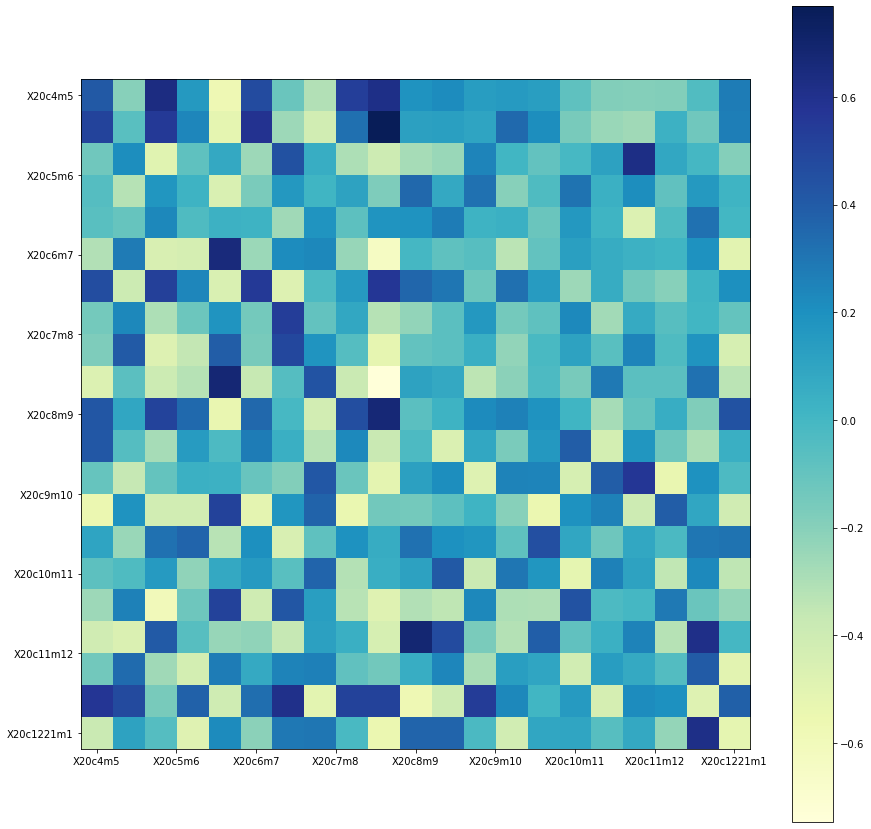

In [129]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(data_corr, cmap="YlGnBu")
ax.set_xticklabels(data_corr.columns)
ax.set_yticklabels(data_corr.index)
fig.colorbar(im)

fig.show()

### seaborn으로 히트맵

Text(0.5, 1.0, 'covid-movie')

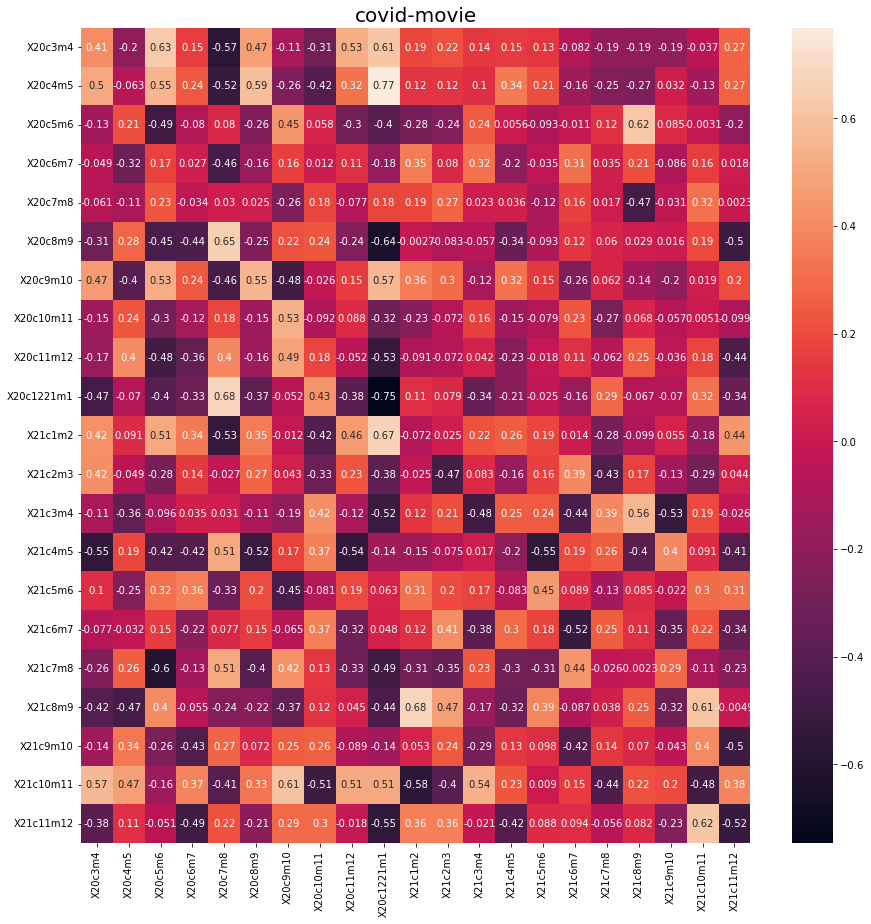

In [135]:
fig = plt.figure()
fig.set_size_inches(15, 15)
sns.heatmap(data_corr, annot=True)
plt.title('covid-movie', fontsize=20)

<AxesSubplot:>

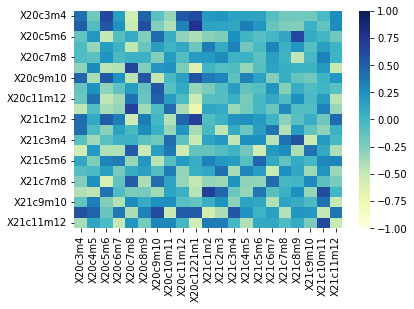

In [125]:
sns.heatmap(data_corr, vmin=-1, vmax=1, cbar=True, center=0, linewidths=0, cmap="YlGnBu")

# plt.title('Annoteat cell with numeric value', fontsize=20)

# plt.show()